# Load libraries and data

In [ ]:
!pip install emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 433.8/433.8 kB 2.5 MB/s eta 0:00:00


In [ ]:
# Import libraries
import warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import string
import nltk
import emoji
import tensorflow as tf
import keras
import plotly.express as px
import xgboost as xgb

nltk.download('wordnet')

from bs4 import BeautifulSoup
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.stem.porter import PorterStemmer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense , Input , LSTM , Embedding, Dropout , Activation, Flatten
from tensorflow.keras.layers import Bidirectional, GlobalMaxPool1D, SpatialDropout1D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras import initializers, regularizers, constraints, optimizers, layers
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, classification_report


warnings.simplefilter(action="ignore", category=FutureWarning)

[nltk_data] Downloading package wordnet to /root/nltk_data...


# Cleaning the review text

In [ ]:
def remove_html_tags(text):
    soup = BeautifulSoup(text, 'html.parser')
    return soup.get_text()

def remove_urls(text):
    return re.sub(r'http\S+|www\S+', '', text)


# Define the punctuation characters to remove
punctuation = str.maketrans(dict.fromkeys(string.punctuation))

# Function to remove punctuation from text
def remove_punctuation(text):
      return text.translate(punctuation)

# Download NLTK stopwords corpus
nltk.download('stopwords')

# Get English stopwords from NLTK
stop_words = set(stopwords.words('english'))

# Function to remove stop words from text
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

def remove_numbers(text):
    return re.sub('[0-9]+', '', text)


def remove_symbols(text):
    return re.sub("[!@#$%^&*(){}£\/'']",'',text)

# Define a dictionary of chat word mappings
chat_words = {
    "AFAIK": "As Far As I Know",
    "AFK": "Away From Keyboard",
    "ASAP": "As Soon As Possible",
    "ATK": "At The Keyboard",
    "ATM": "At The Moment",
    "A3": "Anytime, Anywhere, Anyplace",
    "BAK": "Back At Keyboard",
    "BBL": "Be Back Later",
    "BBS": "Be Back Soon",
    "BFN": "Bye For Now",
    "B4N": "Bye For Now",
    "BRB": "Be Right Back",
    "BRT": "Be Right There",
    "BTW": "By The Way",
    "B4": "Before",
    "B4N": "Bye For Now",
    "CU": "See You",
    "CUL8R": "See You Later",
    "CYA": "See You",
    "FAQ": "Frequently Asked Questions",
    "FC": "Fingers Crossed",
    "FWIW": "For What It's Worth",
    "FYI": "For Your Information",
    "GAL": "Get A Life",
    "GG": "Good Game",
    "GN": "Good Night",
    "GMTA": "Great Minds Think Alike",
    "GR8": "Great!",
    "G9": "Genius",
    "IC": "I See",
    "ICQ": "I Seek you (also a chat program)",
    "ILU": "ILU: I Love You",
    "IMHO": "In My Honest/Humble Opinion",
    "IMO": "In My Opinion",
    "IOW": "In Other Words",
    "IRL": "In Real Life",
    "KISS": "Keep It Simple, Stupid",
    "LDR": "Long Distance Relationship",
    "LMAO": "Laugh My A.. Off",
    "LOL": "Laughing Out Loud",
    "LTNS": "Long Time No See",
    "L8R": "Later",
    "MTE": "My Thoughts Exactly",
    "M8": "Mate",
    "NRN": "No Reply Necessary",
    "OIC": "Oh I See",
    "PITA": "Pain In The A..",
    "PRT": "Party",
    "PRW": "Parents Are Watching",
    "QPSA?": "Que Pasa?",
    "ROFL": "Rolling On The Floor Laughing",
    "ROFLOL": "Rolling On The Floor Laughing Out Loud",
    "ROTFLMAO": "Rolling On The Floor Laughing My A.. Off",
    "SK8": "Skate",
    "STATS": "Your sex and age",
    "ASL": "Age, Sex, Location",
    "THX": "Thank You",
    "TTFN": "Ta-Ta For Now!",
    "TTYL": "Talk To You Later",
    "U": "You",
    "U2": "You Too",
    "U4E": "Yours For Ever",
    "WB": "Welcome Back",
    "WTF": "What The F...",
    "WTG": "Way To Go!",
    "WUF": "Where Are You From?",
    "W8": "Wait...",
    "7K": "Sick:-D Laugher",
    "TFW": "That feeling when",
    "MFW": "My face when",
    "MRW": "My reaction when",
    "IFYP": "I feel your pain",
    "TNTL": "Trying not to laugh",
    "JK": "Just kidding",
    "IDC": "I don't care",
    "ILY": "I love you",
    "IMU": "I miss you",
    "ADIH": "Another day in hell",
    "ZZZ": "Sleeping, bored, tired",
    "WYWH": "Wish you were here",
    "TIME": "Tears in my eyes",
    "BAE": "Before anyone else",
    "FIMH": "Forever in my heart",
    "BSAAW": "Big smile and a wink",
    "BWL": "Bursting with laughter",
    "BFF": "Best friends forever",
    "CSL": "Can't stop laughing"
}

# Function to replace chat words with their full forms
def replace_chat_words(text):
    words = text.split()
    for i, word in enumerate(words):
        if word.lower() in chat_words:
            words[i] = chat_words[word.lower()]
    return ' '.join(words)


# Function to remove emojis from text
def remove_emojis(text):
    return emoji.demojize(text)

# Intilize Lemmatizer
wordnet_lemmatizer = WordNetLemmatizer()


# Intlize PorterStemmer
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def wrangle(filepath, process="default"):

       # Read CSV file
       df = pd.read_csv(filepath)

       # Remove HTML Tags
       df['text'] = df['text'].apply(remove_html_tags)

       # Remove URLs
       df['text'] = df['text'].apply(remove_urls)

       # Convert 'Text' column to lowercase
       df['text'] = df['text'].str.lower()

       # Remove punctuation
       df['text'] = df['text'].apply(remove_punctuation)

       # Handling StopWords
       df['text'] = df['text'].apply(remove_stopwords)

       # Remove Numbers
       df['text']= df['text'].apply(lambda x: remove_numbers(x))

       # Remove Symbols
       df['text']= df['text'].apply(lambda x: remove_symbols(x))

       # Handle Chat Words
       df['text'] = df['text'].apply(replace_chat_words)

       # Remove Emojis
       df['text'] = df['text'].apply(remove_emojis)

       # Stemming or Lemmatization
       if process == "stemming":
            df['text'] = df['text'].apply(lambda x: ' '.join([ps.stem(word) for word in x.split()]))
       elif process == "lemmatization":
            df['text'] = df['text'].apply(lambda x: ' '.join([wordnet_lemmatizer.lemmatize(word , pos='v') for word in x.split()]))
       else:
            df['text'] = df['text']

       return df

In [ ]:
df_train = wrangle("/content/Train.csv", process="stemming")
print(df_train.shape)
df_train.head()

<ipython-input-3-7f276f05d6b6>:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, 'html.parser')


(40000, 2)


In [ ]:
df_train.head()

,text,label
0,grew b watch love thunderbird mate school watc...,0
1,put movi dvd player sat coke chip expect hope ...,0
2,peopl know particular time past like feel need...,0
3,even though great interest biblic movi bore de...,0
4,im die hard dad armi fan noth ever chang got t...,1


In [ ]:
df_valid = wrangle("/content/Valid.csv", process="stemming")
print(df_valid.shape)
df_valid.head()

<ipython-input-3-7f276f05d6b6>:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, 'html.parser')


(5000, 2)


,text,label
0,year sinc sharon stone award viewer legcross t...,0
1,someon need make car payment truli aw make jea...,0
2,guidelin state comment must contain minimum fo...,0
3,movi muddl mishmash cliché recent cinema promi...,0
4,stan laurel becam smaller half alltim greatest...,0


In [ ]:
# For training and evaluation the model
df = pd.concat([df_train, df_valid])
df.sample(3)

,text,label
7094,glorifi discoveri channel documentari part bib...,0
31994,probabl one favorit far although first one see...,1
7930,alistair simm wonder make good headmistress ro...,1


In [ ]:
df.drop_duplicates(inplace = True)

In [ ]:
print(df.shape)
df.info()

(44646, 2)
<class 'pandas.core.frame.DataFrame'>
Index: 44646 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    44646 non-null  object
 1   label   44646 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.0+ MB


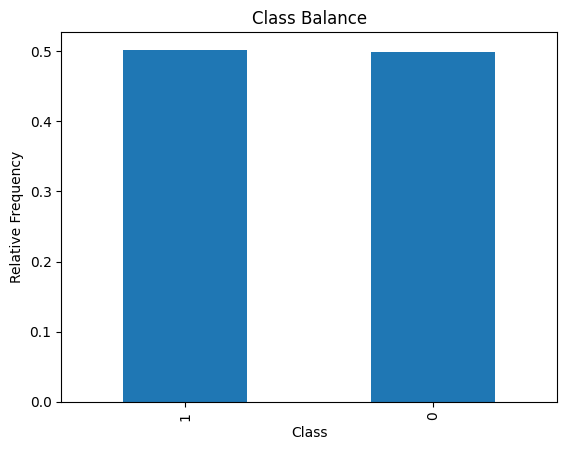

In [ ]:
# Check class balance
df["label"].value_counts(normalize=True).plot(
         kind="bar", xlabel="Class", ylabel="Relative Frequency", title="Class Balance"
);

# ML Models

## Data split

In [ ]:
# First split
X = df['text']
y = df['label']

# Second split
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)

In [ ]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (32000,)
y_train shape: (32000,)
X_test shape: (8000,)
y_test shape: (8000,)


## Baseline model

In [ ]:
acc_baseline = y_train.value_counts(normalize=True).max()
print("Baseline Accuracy:", round(acc_baseline, 2))

Baseline Accuracy: 0.5


## Build Models

In [ ]:
# Define the list of algorithms
algorithms = [
    ("Naive Bayes", MultinomialNB()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Logistic Regression", LogisticRegression(max_iter=1000)),
    ("Random Forest", RandomForestClassifier()),
    ("KNN", KNeighborsClassifier()),
    ("xgb", xgb.XGBClassifier())
]


# Train and evaluate each algorithm
accuracies = []
f1_scores = []

for name, model in algorithms:
    # Instantiate model
    model = make_pipeline(TfidfVectorizer(), model)
    # Fit model
    model.fit(X_train, y_train)
    # Make predictions
    y_pred = model.predict(X_test)
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred) * 100
    accuracies.append((name, accuracy))
    # Calculate F1-score
    cf_matrix = confusion_matrix(y_pred, y_test)
    f1_score_calc = cf_matrix[0][0] / (cf_matrix[0][0] + 0.5 * (cf_matrix[0][1] + cf_matrix[1][0]))
    f1_scores.append((name, f1_score_calc))
    print(f"{name} Test Accuracy: {accuracy:.2f}, F1-score: {f1_score_calc:.2f}")

Naive Bayes Test Accuracy: 85.90, F1-score: 0.86
Decision Tree Test Accuracy: 71.50, F1-score: 0.71
Logistic Regression Test Accuracy: 88.89, F1-score: 0.89
Random Forest Test Accuracy: 84.15, F1-score: 0.84
KNN Test Accuracy: 76.70, F1-score: 0.75
xgb Test Accuracy: 85.00, F1-score: 0.85


In [ ]:
names = [name for name, _ in accuracies]
scores = [score for _, score in accuracies]


fig = px.bar(y=scores , x=names, text_auto='.2s',
            title="Models Accuracies")
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)


fig.update_layout(xaxis_title="Model", yaxis_title="Accuracy [%]")

fig.show()

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

num_folds = 5

kf_model = KFold(n_splits=num_folds, shuffle=True, random_state=42)

cross_val_results = cross_val_score(model, X, y, cv=kf_model)

print(f'Cross-Validation Results (Accuracy): {cross_val_results}')
print(f'Mean Accuracy: {cross_val_results.mean()}')

Cross-Validation Results (Accuracy): [0.84875  0.853125 0.849875 0.852375 0.854   ]
Mean Accuracy: 0.851625


In [ ]:
# Instantiate model
model = make_pipeline(TfidfVectorizer(), LogisticRegression())

# Fit the model
model.fit(X_train, y_train)

# Evaluate the model
print("Training Accuracy :", round(model.score(X_train, y_train),2))

# Predict the labels for the test data
y_pred = model.predict(X_test)

# Calculate and print the accuracy score
print("Accuracy Score:", round(accuracy_score(y_test, y_pred),2))

# Print the classification report
print(classification_report(y_test, y_pred))

# Calculate F1-score
cf_matrix = confusion_matrix(y_pred, y_test)
f1_score_calc = cf_matrix[0][0] / (cf_matrix[0][0] + 0.5 * (cf_matrix[0][1] + cf_matrix[1][0]))
print('F1-score: %.3f' % f1_score_calc)
print("Confusion Matrix : ", cf_matrix)

Training Accuracy : 0.93
Accuracy Score: 0.89
              precision    recall  f1-score   support

           0       0.89      0.88      0.89      3966
           1       0.88      0.90      0.89      4034

    accuracy                           0.89      8000
   macro avg       0.89      0.89      0.89      8000
weighted avg       0.89      0.89      0.89      8000

F1-score: 0.887
Confusion Matrix :  [[3487  410]
 [ 479 3624]]


# LSTM Model

## Data Processing

In [ ]:
vocab_size = 1000

oov_tok = ''    # This represents the out-of-vocabulary token.

embedding_dim = 100  #Each word will be represented by a vector of this size.

max_length = 200 # This defines the maximum length of input sequences.

padding_type='post'
trunc_type='post'

# tokenize sentences
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(df_train['text'])
word_index = tokenizer.word_index

# convert train dataset to sequence and pad sequences
X_train = tokenizer.texts_to_sequences(df_train['text'])
X_train = pad_sequences(X_train, padding='post', maxlen=max_length)

# convert Test dataset to sequence and pad sequences
X_val = tokenizer.texts_to_sequences(df_valid['text'])
X_val = pad_sequences(X_val, padding='post', maxlen=max_length)


y_train = df_train['label']
y_val = df_valid['label']

y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_val = tf.keras.utils.to_categorical(y_val, num_classes=2)

In [ ]:
# Define the callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=1, mode='auto')
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2)

## Build Models

### First Model

In [ ]:
model = keras.Sequential([

    keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    keras.layers.Bidirectional(keras.layers.LSTM(100, dropout=0.2, recurrent_dropout=0.2)),
    keras.layers.Dense(24, activation='relu'),
    keras.layers.Dense(2, activation='sigmoid')
])



model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 100)          100000    
                                                                 
 bidirectional (Bidirection  (None, 200)               160800    
 al)                                                             
                                                                 
 dense (Dense)               (None, 24)                4824      
                                                                 
 dense_1 (Dense)             (None, 2)                 50        
                                                                 
Total params: 265674 (1.01 MB)
Trainable params: 265674 (1.01 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train,
                   epochs=10,
                   batch_size=32,
                   validation_data=(X_val, y_val),
                   callbacks=[early_stopping, reduce_lr]
)

Epoch 1/10
1250/1250 [==============================] - 1045s 832ms/step - loss: 0.5938 - accuracy: 0.6885 - val_loss: 0.5699 - val_accuracy: 0.7458 - lr: 0.0010
Epoch 2/10
1250/1250 [==============================] - 952s 761ms/step - loss: 0.4872 - accuracy: 0.7699 - val_loss: 0.3719 - val_accuracy: 0.8430 - lr: 0.0010
Epoch 3/10
1250/1250 [==============================] - 943s 754ms/step - loss: 0.3388 - accuracy: 0.8545 - val_loss: 0.3359 - val_accuracy: 0.8570 - lr: 0.0010
Epoch 4/10
1250/1250 [==============================] - 930s 744ms/step - loss: 0.3150 - accuracy: 0.8647 - val_loss: 0.3309 - val_accuracy: 0.8528 - lr: 0.0010
Epoch 5/10
1250/1250 [==============================] - 928s 743ms/step - loss: 0.2993 - accuracy: 0.8734 - val_loss: 0.3216 - val_accuracy: 0.8584 - lr: 0.0010
Epoch 6/10
1250/1250 [==============================] - 943s 755ms/step - loss: 0.2852 - accuracy: 0.8797 - val_loss: 0.3229 - val_accuracy: 0.8592 - lr: 0.0010
Epoch 7/10
1250/1250 [===========

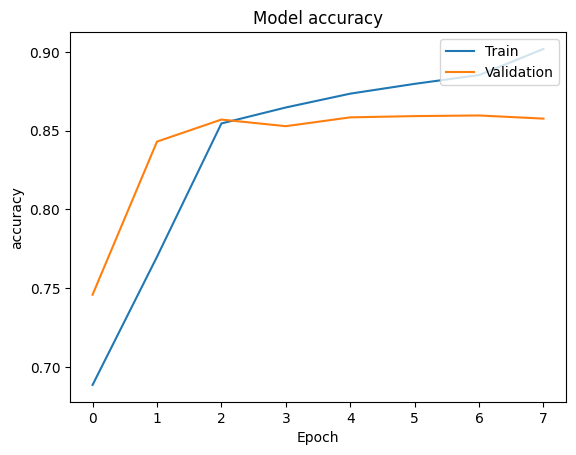

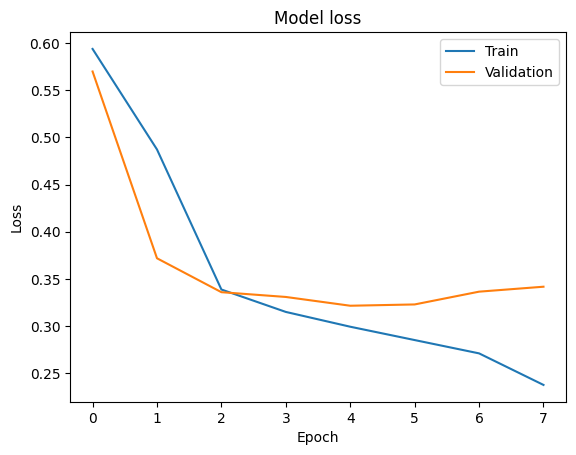

In [ ]:
# Plotting the training and testing accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Plotting the training and testing loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
y_prediction = model.predict(X_val)

pred_labels = np.argmax(y_prediction, axis=1)

model_acc =  accuracy_score(df_vaild['label'], pred_labels)

print("Accuracy of prediction on val set (Model): ", model_acc)

157/157 [==============================] - 27s 172ms/step
Accuracy of prediction on val set (Model):  0.8576


### Third Model

In [ ]:
model2 = keras.Sequential([
    keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    keras.layers.Bidirectional(keras.layers.LSTM(128, dropout=0.2, recurrent_dropout=0.2, return_sequences=True)),
    keras.layers.Bidirectional(keras.layers.LSTM(64, dropout=0.2, recurrent_dropout=0.2)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(2, activation='sigmoid')
])


model2.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 100)          100000    
                                                                 
 bidirectional_1 (Bidirecti  (None, 200, 256)          234496    
 onal)                                                           
                                                                 
 bidirectional_2 (Bidirecti  (None, 128)               164352    
 onal)                                                           
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 2)                

In [ ]:
history = model2.fit(X_train, y_train,
                   epochs=10,
                   batch_size=264,
                   validation_data=(X_val, y_val),
                   callbacks=[early_stopping, reduce_lr]
)

Epoch 1/10
152/152 [==============================] - 1300s 8s/step - loss: 0.5139 - accuracy: 0.7453 - val_loss: 0.3719 - val_accuracy: 0.8466 - lr: 0.0010
Epoch 2/10
152/152 [==============================] - 1280s 8s/step - loss: 0.3932 - accuracy: 0.8313 - val_loss: 0.4401 - val_accuracy: 0.8108 - lr: 0.0010
Epoch 3/10
152/152 [==============================] - 1353s 9s/step - loss: 0.4132 - accuracy: 0.8271 - val_loss: 0.3717 - val_accuracy: 0.8470 - lr: 0.0010
Epoch 4/10
152/152 [==============================] - 1342s 9s/step - loss: 0.3439 - accuracy: 0.8577 - val_loss: 0.3480 - val_accuracy: 0.8522 - lr: 0.0010
Epoch 5/10
152/152 [==============================] - 1347s 9s/step - loss: 0.3303 - accuracy: 0.8623 - val_loss: 0.3572 - val_accuracy: 0.8474 - lr: 0.0010
Epoch 6/10
152/152 [==============================] - 1360s 9s/step - loss: 0.3197 - accuracy: 0.8657 - val_loss: 0.3300 - val_accuracy: 0.8560 - lr: 0.0010
Epoch 7/10
152/152 [==============================] - 1331

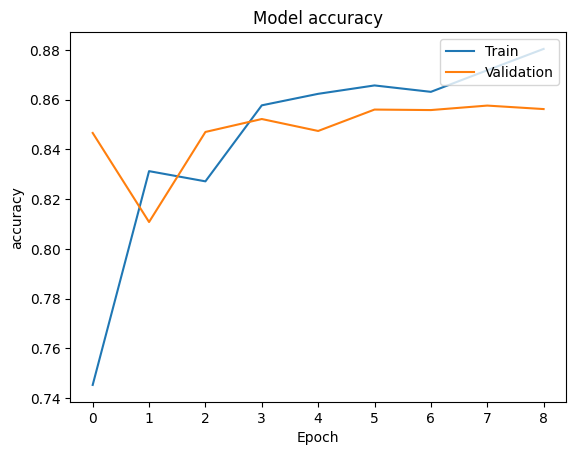

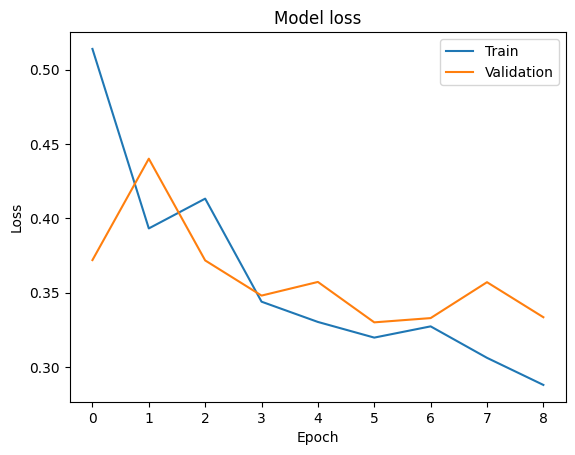

In [ ]:
# Plotting the training and testing accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Plotting the training and testing loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
y_prediction = model2.predict(X_val)

pred_labels = np.argmax(y_prediction, axis=1)

model2_acc =  accuracy_score(df_valid['label'], pred_labels)

print("Accuracy of prediction on val set (Model 2): ", model2_acc)

157/157 [==============================] - 51s 327ms/step
Accuracy of prediction on val set (Model 2):  0.8562


### Second Model

In [ ]:
model1 = Sequential()
model1.add(Embedding(vocab_size, embedding_dim))
model1.add(SpatialDropout1D(0.2))
model1.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model1.add(Dense(2, activation='sigmoid'))

# Compile the model
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print model summary
model1.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, None, 100)         100000    
                                                                 
 spatial_dropout1d_6 (Spati  (None, None, 100)         0         
 alDropout1D)                                                    
                                                                 
 lstm_13 (LSTM)              (None, 100)               80400     
                                                                 
 dense_18 (Dense)            (None, 2)                 202       
                                                                 
Total params: 180602 (705.48 KB)
Trainable params: 180602 (705.48 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = model1.fit(X_train, y_train,
                   epochs=10,
                   batch_size=264,
                   validation_data=(X_val, y_val),
                   callbacks=[early_stopping, reduce_lr]
)

Epoch 1/10
152/152 [==============================] - 305s 2s/step - loss: 0.6907 - accuracy: 0.5179 - val_loss: 0.6937 - val_accuracy: 0.5138 - lr: 0.0010
Epoch 2/10
152/152 [==============================] - 301s 2s/step - loss: 0.6677 - accuracy: 0.5674 - val_loss: 0.6147 - val_accuracy: 0.6538 - lr: 0.0010
Epoch 3/10
152/152 [==============================] - 295s 2s/step - loss: 0.6669 - accuracy: 0.5893 - val_loss: 0.6885 - val_accuracy: 0.5162 - lr: 0.0010
Epoch 4/10
152/152 [==============================] - 293s 2s/step - loss: 0.6826 - accuracy: 0.5299 - val_loss: 0.6806 - val_accuracy: 0.5304 - lr: 0.0010
Epoch 5/10
152/152 [==============================] - 296s 2s/step - loss: 0.6684 - accuracy: 0.5433 - val_loss: 0.6707 - val_accuracy: 0.5438 - lr: 2.0000e-04
Epoch 5: early stopping


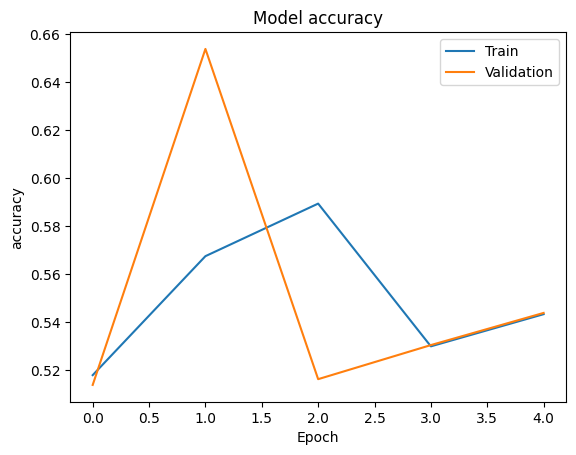

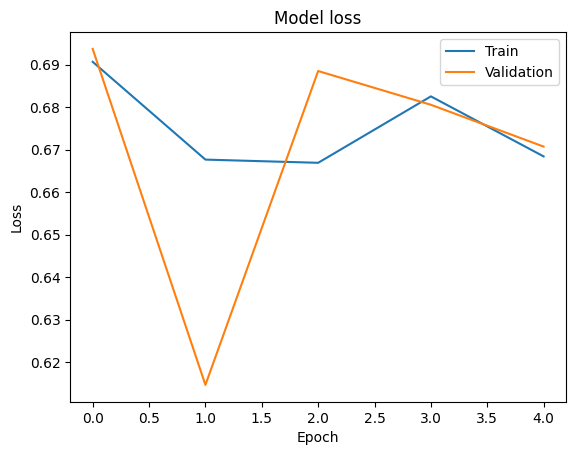

In [ ]:
# Plotting the training and testing accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Plotting the training and testing loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
prediction = model1.predict(X_val)
pred_labels = np.argmax(prediction, axis=1)

model1_acc =  accuracy_score(df_valid['label'], pred_labels)

print("Accuracy of prediction on val set (Model 1): ", model1_acc)

157/157 [==============================] - 11s 70ms/step
Accuracy of prediction on val set (Model 1):  0.5438


## Model 3

In [ ]:
model3 = Sequential()
model3.add(Embedding(vocab_size, embedding_dim))
model3.add(LSTM(50, return_sequences = True))
model3.add(GlobalMaxPool1D())
model3.add(Dense(16, activation="relu"))
model3.add(Dropout(0.8))
model3.add(Dense(2, activation="sigmoid")) # Changed the number of units to 2

# Compile the model
model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print model summary
model3.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, None, 100)         100000    
                                                                 
 lstm_8 (LSTM)               (None, None, 50)          30200     
                                                                 
 global_max_pooling1d_3 (Gl  (None, 50)                0         
 obalMaxPooling1D)                                               
                                                                 
 dense_12 (Dense)            (None, 16)                816       
                                                                 
 dropout_4 (Dropout)         (None, 16)                0         
                                                                 
 dense_13 (Dense)            (None, 2)                 34        
                                                      

In [ ]:
history = model3.fit(X_train, y_train,
                   epochs=10,
                   batch_size=264,
                   validation_data=(X_val, y_val),
                   callbacks=[early_stopping, reduce_lr]
)

Epoch 1/10
152/152 [==============================] - 98s 601ms/step - loss: 0.6668 - accuracy: 0.5897 - val_loss: 0.5801 - val_accuracy: 0.7304 - lr: 0.0010
Epoch 2/10
152/152 [==============================] - 95s 624ms/step - loss: 0.6016 - accuracy: 0.6700 - val_loss: 0.5021 - val_accuracy: 0.7532 - lr: 0.0010
Epoch 3/10
152/152 [==============================] - 92s 603ms/step - loss: 0.5290 - accuracy: 0.7211 - val_loss: 0.4105 - val_accuracy: 0.8252 - lr: 0.0010
Epoch 4/10
152/152 [==============================] - 112s 737ms/step - loss: 0.4727 - accuracy: 0.7548 - val_loss: 0.3794 - val_accuracy: 0.8388 - lr: 0.0010
Epoch 5/10
152/152 [==============================] - 126s 832ms/step - loss: 0.4616 - accuracy: 0.7611 - val_loss: 0.3610 - val_accuracy: 0.8362 - lr: 0.0010
Epoch 6/10
152/152 [==============================] - 93s 611ms/step - loss: 0.4435 - accuracy: 0.7836 - val_loss: 0.3526 - val_accuracy: 0.8470 - lr: 0.0010
Epoch 7/10
152/152 [==============================

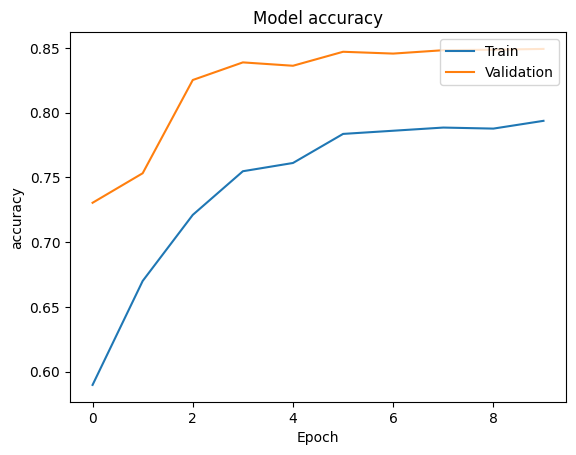

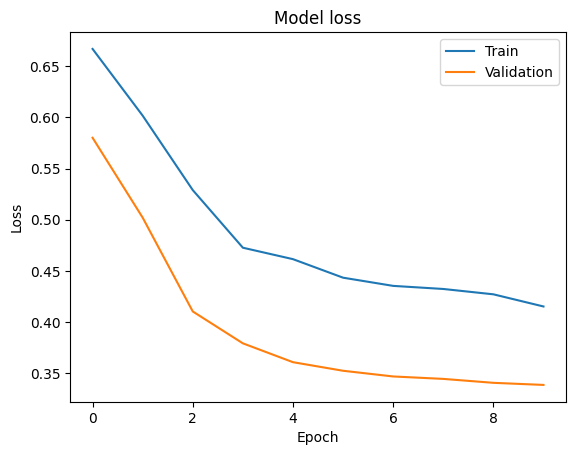

In [ ]:
# Plotting the training and testing accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Plotting the training and testing loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
prediction = model3.predict(X_val)
pred_labels = np.argmax(prediction, axis=1)

model3_acc =  accuracy_score(df_valid['label'], pred_labels)

print("Accuracy of prediction on val set (Model 3): ", model3_acc)

157/157 [==============================] - 6s 35ms/step
Accuracy of prediction on val set (Model 3):  0.8492


In [ ]:
models = ['model', 'model1', 'model2', 'model3']
acc = [model_acc, model1_acc, model2_acc, model3_acc]

df = {'Model':models, 'accuracy':acc}

df = pd.DataFrame(df)
df

,Model,accuracy
0,model,0.8576
1,model1,0.5438
2,model2,0.8562
3,model3,0.8492


In [ ]:
fig = px.bar(y=scores , x=names, text_auto='.2s',
            title="Models Accuracies")
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)


fig.update_layout(xaxis_title="Model", yaxis_title="Accuracy [%]")

fig.show()

In [ ]:
fig = px.bar(y=df["accuracy"] , x=df["Model"], text_auto='.2',
            title="Models Accuracies")
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)


fig.update_layout(xaxis_title="Model", yaxis_title="Accuracy [%]")

fig.show()

# Submission

In [ ]:
df_test = wrangle("/content/Test.csv", process="stemming")
print(df_test.shape)
df_test.head()

<ipython-input-3-7f276f05d6b6>:2: MarkupResemblesLocatorWarning:

The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.



(5000, 3)


,id,text,label
0,0,alway wrote seri complet stinkfest jim belushi...,NaN
1,1,st watch dirstev purcel typic mari kate ashley...,NaN
2,2,movi poorli written direct fell asleep minut m...,NaN
3,3,interest thing miryang secret sunshin actor je...,NaN
4,4,first read berlin meer didnt expect much thoug...,NaN


## LSTM Submission

In [ ]:
X_test = df_test['text']

X_test = tokenizer.texts_to_sequences(X_test)

X_test = pad_sequences(X_test, padding='post', maxlen=max_length)

In [ ]:
y_pred = []


y = model3.predict(X_test)

for i in y:
    if i[1] >= 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

157/157 [==============================] - 10s 67ms/step


In [ ]:
sub_df = pd.read_csv("/content/sample_submission.csv")
sub_df = sub_df.assign(label=y_pred)
sub_df.head()

,id,label
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [ ]:
sub_df["label"].value_counts()

label
0    2597
1    2403
Name: count, dtype: int64

In [ ]:
sub_df.to_csv("submission.csv", index=False)

## ML Submission

In [ ]:
model = make_pipeline(
                      TfidfVectorizer(),
                      LogisticRegression()
)

X_test = df_test['text']

model.predict(X_test)
sub_pred = sub_pred.tolist()

In [ ]:
sub_df = pd.read_csv("/content/sample_submission.csv")
sub_df = sub_df.assign(label=sub_pred)

In [ ]:
sub_df["label"].value_counts()

label
1    2760
0    2240
Name: count, dtype: int64